In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
dftrain = pd.read_csv("C:/Users/shiva/python programs/HR analytics/train_LZdllcl.csv")
dftest = pd.read_csv("C:/Users/shiva/python programs/HR analytics/test_2umaH9m.csv")

In [3]:
dftrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
print("train set shape : ",dftrain.shape)
print("test set shape",dftest.shape)

train set shape :  (54808, 14)
test set shape (23490, 13)


In [5]:
print(dftrain.isnull().sum())
print("-*-"*10)
print(dftest.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
-*--*--*--*--*--*--*--*--*--*-
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


# My main intention here is to gain much usefull insights by just using basic viasualizations methods and techniques

we can clearly observe that the same columns in the train & test have the missing values so lets try to handle with them in further and as we can see that the data is approximately split in 80:20 ratio so to bring some visual insights will just use train df as anyhow both data sets behavior is same. 

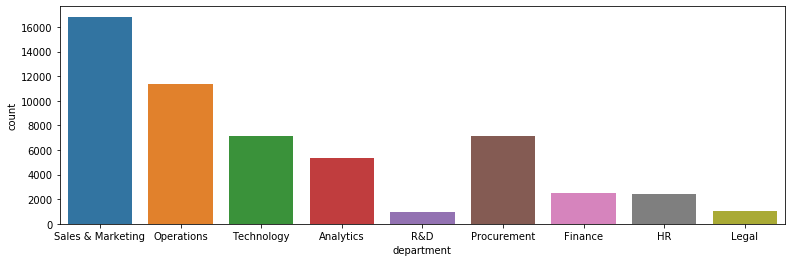

In [6]:
#lets start with some univariate visual analysis
plt.figure(figsize=(13,4))
sns.countplot("department",data=dftrain)

we can see that the top 5 Departments are Sales&Marketing,Operation,Technology,Procurement,Analytics & R&D ,Legal as the least once

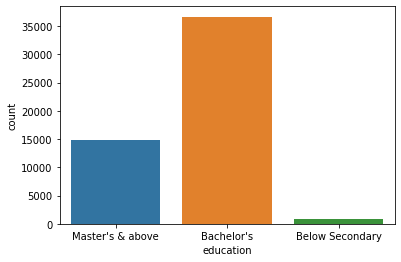

In [7]:
sns.countplot("education",data=dftrain)

in terms of education it seems most of the candidates are with Bachelor's degree

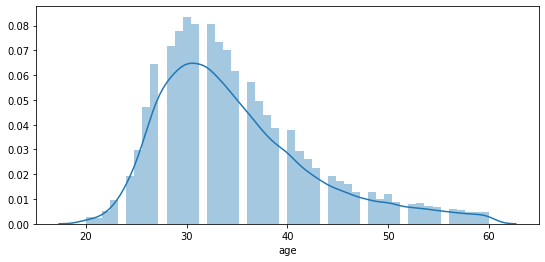

In [8]:
plt.figure(figsize=(9,4))
sns.distplot(dftrain["age"])
plt.show()

from the above graph we can notice that most of candidates range from age 25-35 which is good to look at when considering of promotion based on the other parameters

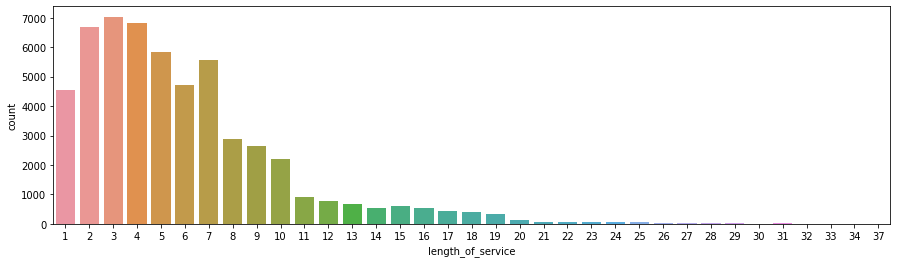

In [9]:
plt.figure(figsize=(15,4))
sns.countplot('length_of_service',data=dftrain)

it can be observed that number of services are ranging from 2-4 with most of the candidates

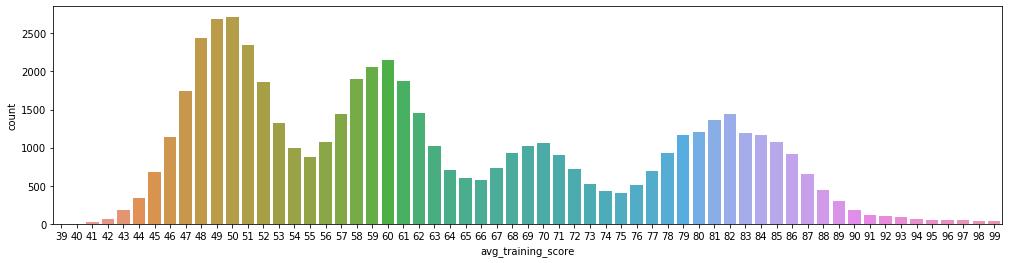

In [10]:
plt.figure(figsize=(17,4))
sns.countplot("avg_training_score",data=dftrain)

from this we can observe that most of the candidates get AVG_TRAINING_SCORE are between score 48-51 and then at 58-62 and we see very less candidates with score 90 & above

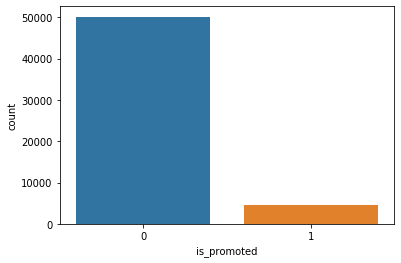

In [11]:
sns.countplot("is_promoted",data=dftrain)

from above it can be seen that chances for candidates getting promoted are very less in number

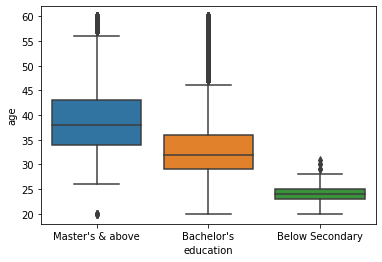

In [12]:
sns.boxplot(y="age",x="education",data=dftrain)

from the above plot it can be observed that on an avarage we have people with master's & above at ate of 36,and bachelors at age:33 & avg age of people with below secondary degree are at age:24 this insight can also be included while thinking of promotion for an specific candidate 

# now lets jump into doing some bivariate analysis

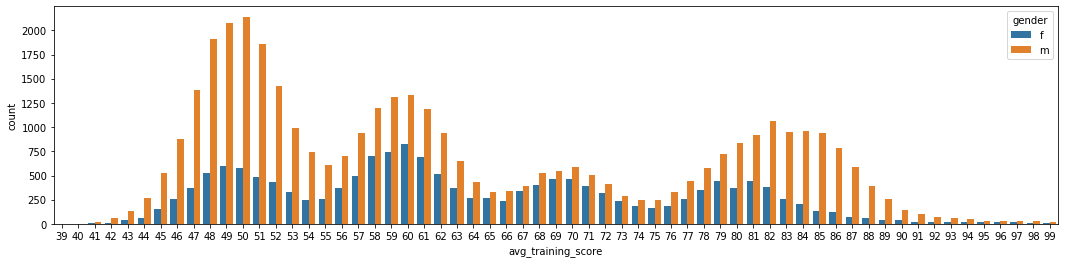

In [13]:
plt.figure(figsize=(18,4))
sns.countplot("avg_training_score",data=dftrain,hue="gender")

we see mostly Male being with high training_score

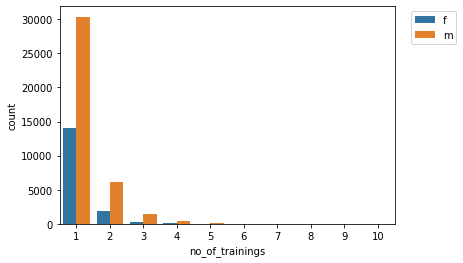

In [14]:
sns.countplot("no_of_trainings",data=dftrain,hue="gender")
plt.legend(bbox_to_anchor=(1.2,1),loc="upper right")

most men are in high count in number of trainings and most candidates are with number of trainings -> 1 

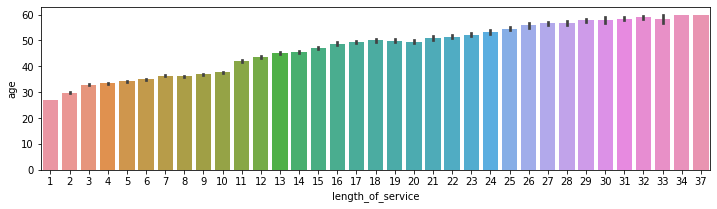

In [15]:
plt.figure(figsize=(12,3))
sns.barplot(y="age",x="length_of_service",data=dftrain)

as a known fact length of service increasing with age
lets break it down by seeing which gender stay most with there services

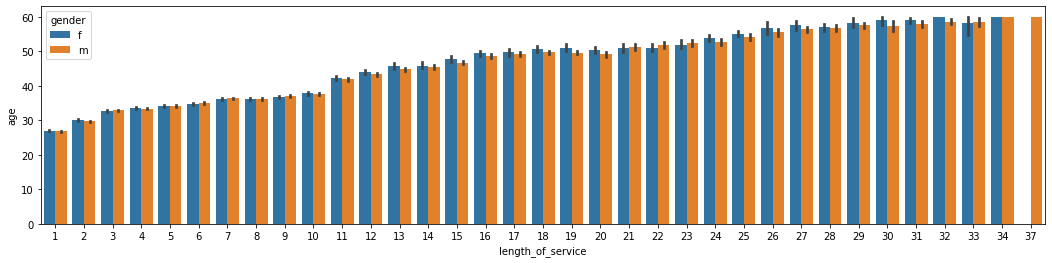

In [16]:
plt.figure(figsize=(18,4))
sns.barplot(y="age",x="length_of_service",data=dftrain,hue="gender")

we see more elder females then males from services 11-32

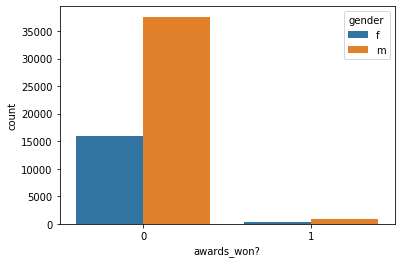

In [17]:
sns.countplot(x="awards_won?",data=dftrain,hue="gender")

we see a preety much high count of males in terms of awards won but on over all number of awards won is less in ratio

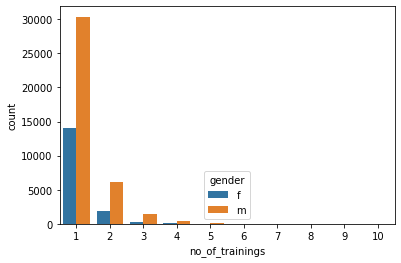

In [18]:
sns.countplot("no_of_trainings",data=dftrain,hue='gender')

we see less number of candidates with more number of trainings but mostly candidates count is seen high with number of trainings 1 and males being the highest in count

# Let' start exploring more from data

In [29]:
dftrain.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [40]:
print('train data set\n',dftrain.education.value_counts())
print("- -"*10)
print("test data set\n",dftest.education.value_counts())

train data set
 Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
- -- -- -- -- -- -- -- -- -- -
test data set
 Bachelor's          16612
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64


In [20]:
dftrain.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
#lets fill the missing values
dftrain["education"].fillna('Bachelor\'s',inplace=True)
dftrain["previous_year_rating"].fillna(3.0,inplace=True)

In [22]:
dftrain.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [23]:
dftest.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [24]:
#lets do the same thing here
dftest["education"].fillna('Bachelor\'s',inplace=True)
dftest["previous_year_rating"].fillna(3.0,inplace=True)

In [25]:
dftest.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [28]:
#now lets make the final dataset by combining them to form a whole set of data for prediction
#should dive into more by applying various models and training them and hypertuning them to get better accuracy and fine working model